## 군집화(Clustering) = K-Means Algoritm

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### Iris 데이터로 군집화

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
irisDF.head(3)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 차원 축소 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

irisDF['pca_x'] = iris_pca[:, 0]
irisDF['pca_y'] = iris_pca[:, 1]
irisDF.head()

,sl,sw,pl,pw,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


### K-Means 모델 생성/학습

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [6]:
#K-Means결과확인
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [7]:
irisDF['target'] = iris.target #실제정답컬럼추가 targeet calss
irisDF['cluster'] = kmeans.labels_ #Clusturing결과 도출된 class (구별이 된것일뿐, 타겟과는 다르게표시됨)
irisDF.head()

,sl,sw,pl,pw,pca_x,pca_y,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,0
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,0
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,0
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0,0
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0,0


In [8]:
clustering_result = irisDF.groupby(['target','cluster']).count()
clustering_result.head() #군집화 결과 그룹바이; 

sl  sw  pl  pw  pca_x  pca_y
target cluster                              
0      0        50  50  50  50     50     50
1      1        11  11  11  11     11     11
       2        39  39  39  39     39     39
2      1        36  36  36  36     36     36
       2        14  14  14  14     14     14

### 시각화
- Clustering한 결과를 차원 축소하여 시각화

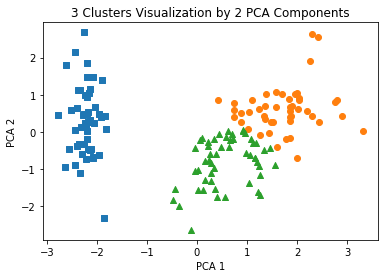

In [9]:
markers=['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.cluster == i]['pca_x']
    y_axis_data = irisDF[irisDF.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 원 데이터를 차원 축소하여 시각화

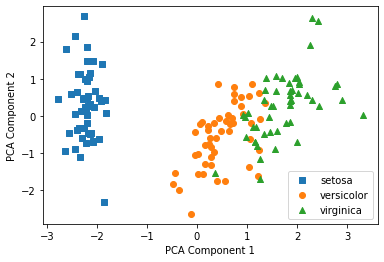

In [10]:
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.target == i]['pca_x']
    y_axis_data = irisDF[irisDF.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 비교 그림

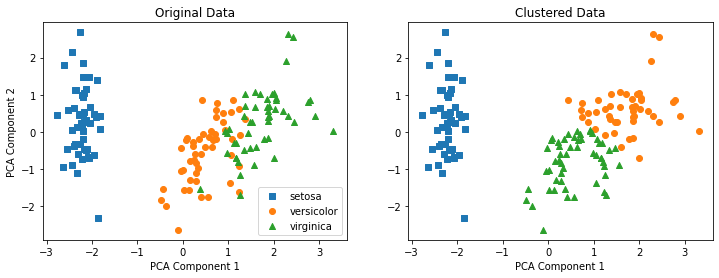

In [11]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = irisDF[irisDF[column] == i]['pca_x']
        y_axis_data = irisDF[irisDF[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                    label=iris.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

## (별도) 군집화 결과를 정규화+차원축소하여 시각화

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [8]:
irisDF['pca_x'] = iris_pca[:, 0] #행은전부, 0번째 첫번째 열
irisDF['pca_y'] = iris_pca[:, 1]
irisDF.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


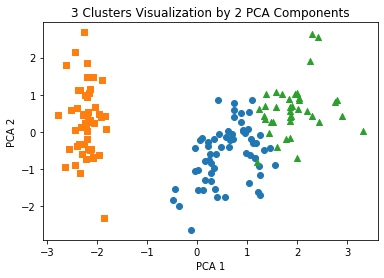

In [14]:
cls0_index = irisDF[irisDF.cluster == 0].index
cls1_index = irisDF[irisDF.cluster == 1].index
cls2_index = irisDF[irisDF.cluster == 2].index

plt.scatter(x=irisDF.loc[cls0_index,'pca_x'], 
            y=irisDF.loc[cls0_index,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[cls1_index,'pca_x'], 
            y=irisDF.loc[cls1_index,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[cls2_index,'pca_x'], 
            y=irisDF.loc[cls2_index,'pca_y'], marker='^')

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

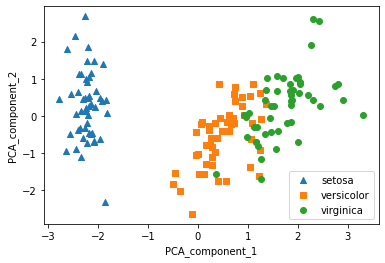

In [10]:
markers=['^', 's', 'o']

#PCA_component_1을 x축, PCA_component_2를 y축으로 scatter plot수행.  
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.target == i]['pca_x']
    y_axis_data = irisDF[irisDF.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA_component_1')
plt.ylabel('PCA_component_2')
plt.show()

## (여기까지 별도))

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [28]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=4, random_state=2021)
print(X.shape, y.shape) #y는 클러스터링 잘됐는지 확인하려고

(200, 2) (200,)


In [29]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)
#0이 67개, 1이 67개, 2가 66개

[0 1 2] [67 67 66]


In [30]:
clusterDF = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.420755,0.524051,1
1,9.606759,-16.785233,2
2,9.463470,-12.342820,2
3,5.992541,-9.566412,2
4,-5.988626,4.843629,1


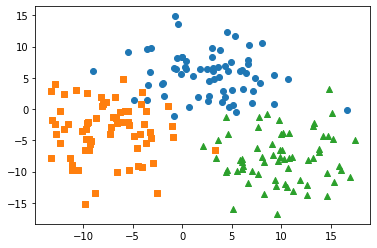

In [31]:
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF.target == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[target])
plt.show()

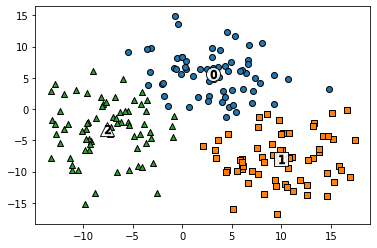

In [32]:
# 중심점을 찍어보자.
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()


In [33]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               62
        2                4
        1                1
1       2               65
        0                1
        1                1
2       1               64
        0                2
Name: kmeans_label, dtype: int64